In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text
import warnings
warnings.filterwarnings('ignore')
plt.style.use ('ggplot')


In [8]:
df=pd.read_csv(r"C:\Users\sandr\Downloads\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
columns=list(df.columns)

In [10]:
print(columns)

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


In [5]:
df.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [12]:
df.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'CompPrice'),
  Text(2, 0, 'Income'),
  Text(3, 0, 'Advertising'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'Education')])

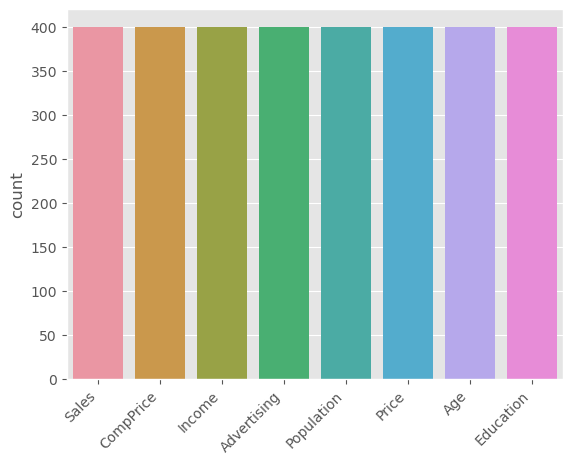

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,)
plt.xticks(rotation=45, ha='right')

<Axes: >

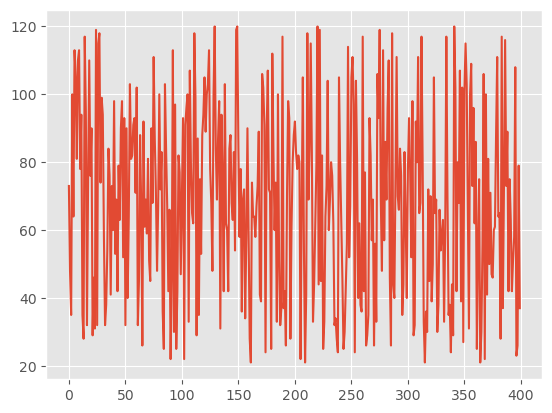

In [11]:
df['Income'].plot()

<Axes: xlabel='Age', ylabel='Income'>

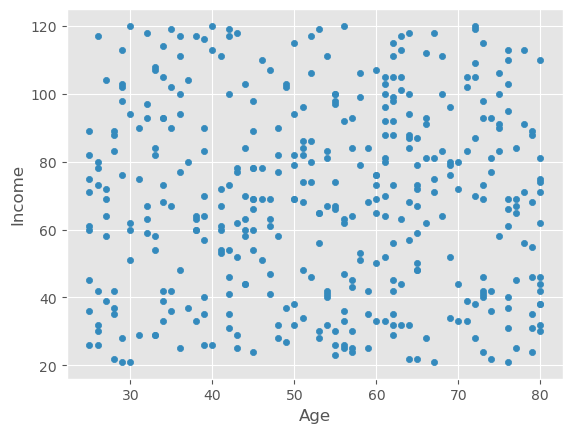

In [14]:
df.plot(kind ='scatter',x ='Age', y="Income")

Age
25    60.56
26    59.75
27    67.67
28    56.57
29    77.29
30    68.00
31    64.67
32    82.83
33    68.88
34    73.33
35    76.00
36    81.71
37    73.67
38    66.17
39    64.56
40    86.33
41    68.29
42    68.44
43    63.00
44    65.75
45    68.50
46    77.00
47    64.67
48    61.17
49    67.25
50    72.25
51    71.50
52    84.83
53    60.50
54    62.12
55    68.10
56    56.00
57    51.00
58    77.60
59    50.80
60    68.62
61    80.33
62    72.86
63    82.14
64    75.00
65    60.50
66    77.83
67    73.20
68    89.50
69    69.50
70    57.25
71    72.40
72    84.50
73    64.10
74    58.50
75    88.00
76    67.82
77    59.17
78    82.75
79    54.50
80    57.15
Name: Income, dtype: float64


<Axes: xlabel='Age'>

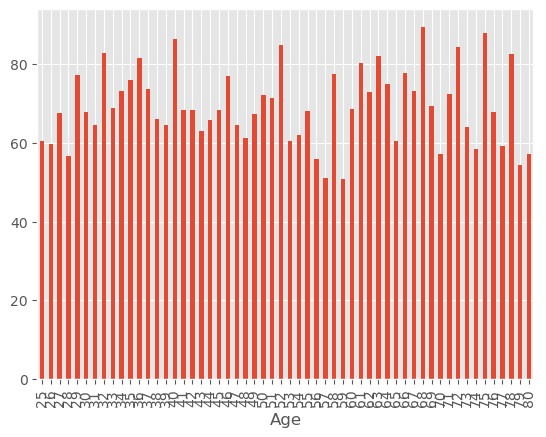

In [18]:
q= round(df.groupby("Age")["Income"].mean(),2)
print(q)
q.plot(kind ='bar')

array([<Axes: ylabel='Income'>], dtype=object)

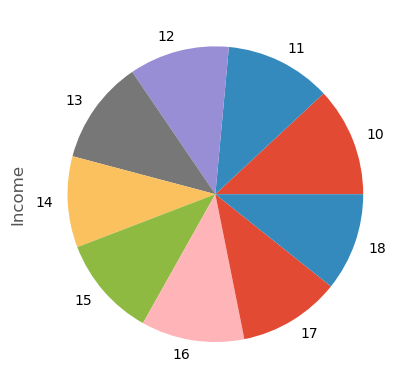

In [15]:
w= round(df.groupby("Education")["Income"].mean(),2)
w.plot(kind ='pie',subplots =True)

array([<Axes: title={'center': 'Income'}, xlabel='Education'>],
      dtype=object)

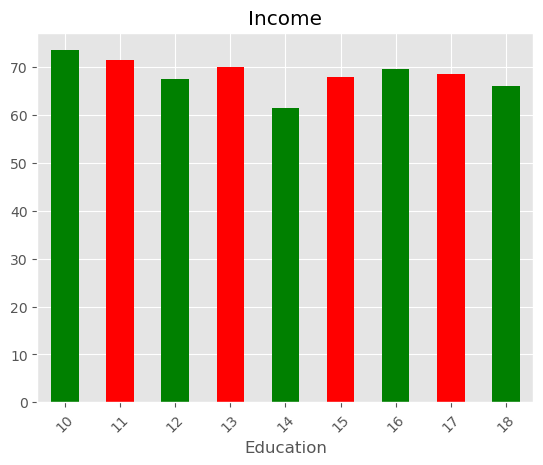

In [17]:
w.plot.bar(color =['green','red'],subplots =True,rot =45)

<Axes: >

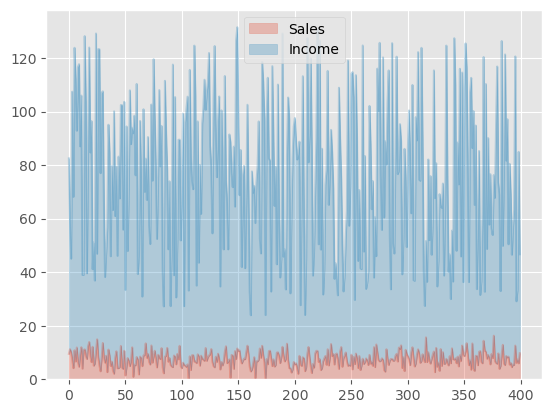

In [18]:
df[['Sales','Income']].plot(kind ='area',alpha =0.3)

<Axes: ylabel='Density'>

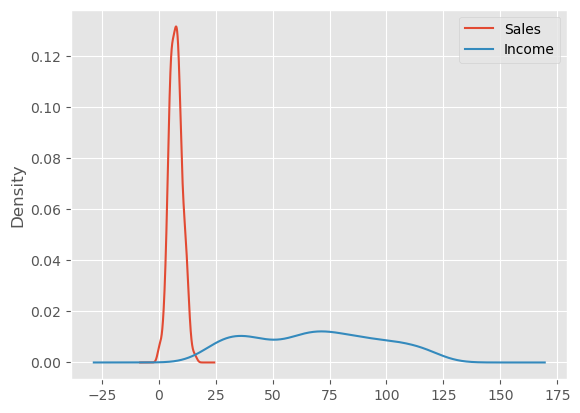

In [19]:
df[['Sales','Income']].plot(kind='kde')

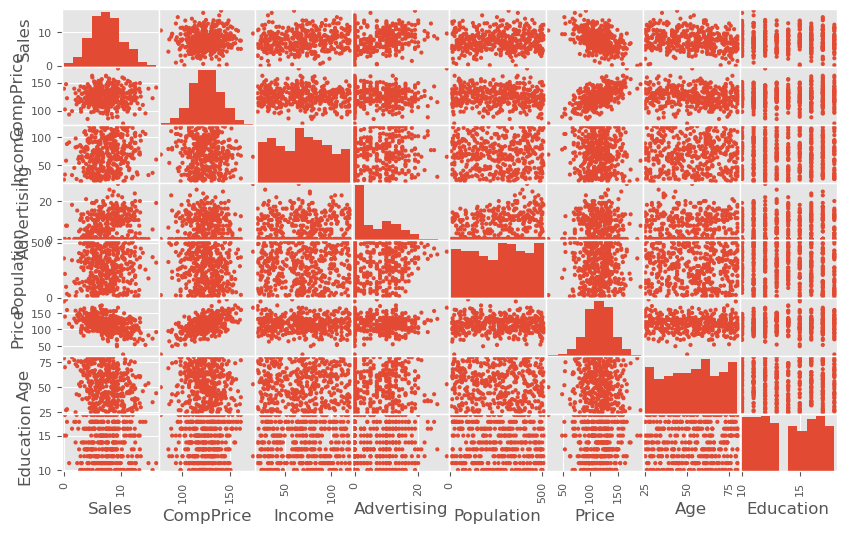

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

In [21]:
df1=pd.get_dummies(df, columns=['US','Urban','ShelveLoc'], drop_first=True)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,US_Yes,Urban_Yes,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,True,True,False,False
1,11.22,111,48,16,260,83,65,10,True,True,True,False
2,10.06,113,35,10,269,80,59,12,True,True,False,True
3,7.40,117,100,4,466,97,55,14,True,True,False,True
4,4.15,141,64,3,340,128,38,13,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,True,True,True,False
396,6.14,139,23,3,37,120,55,11,True,False,False,True
397,7.41,162,26,12,368,159,40,18,True,True,False,True
398,5.94,100,79,7,284,95,50,12,True,True,False,False


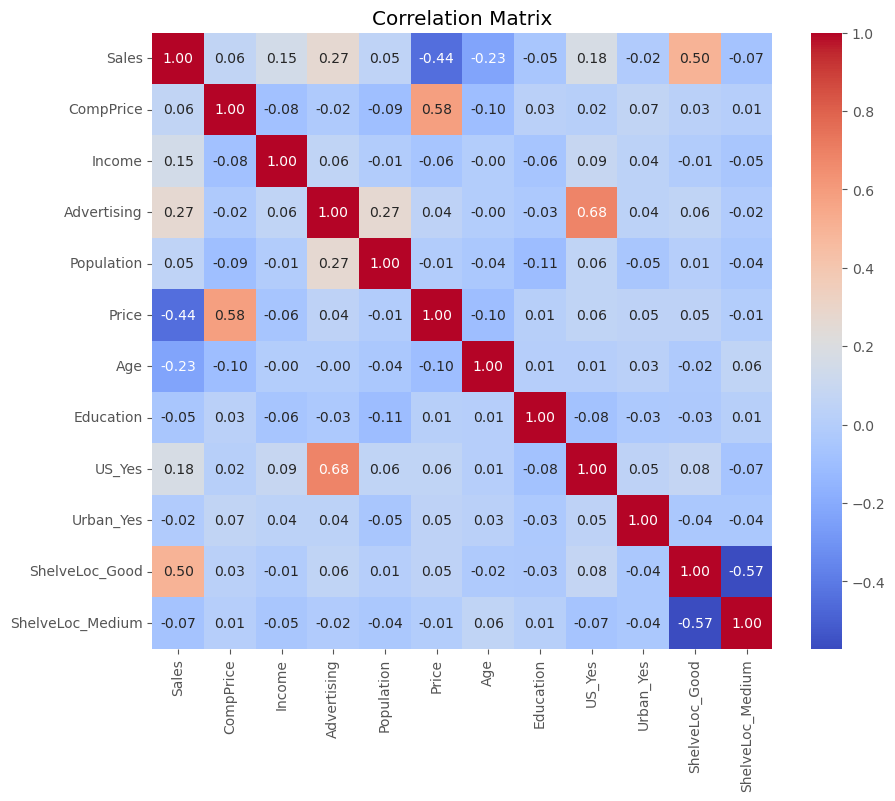

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

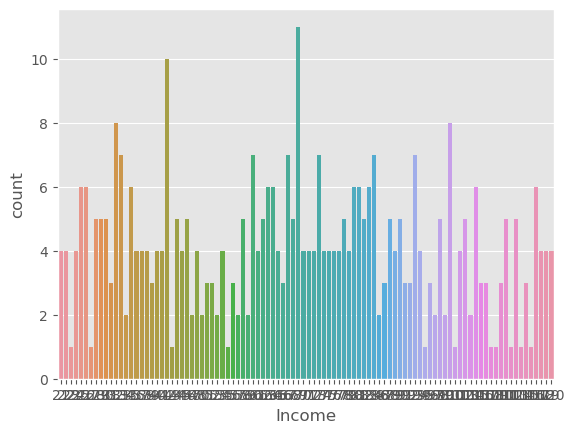

In [23]:
sns.countplot(x='Income', data=df)

plt.show()

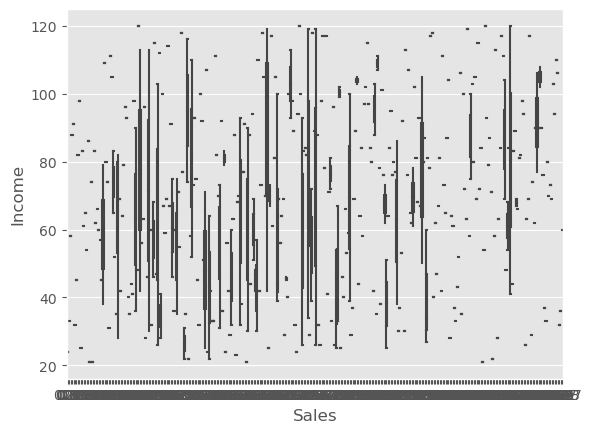

In [24]:
sns.boxplot(x='Sales', y='Income', data=df)
plt.show()

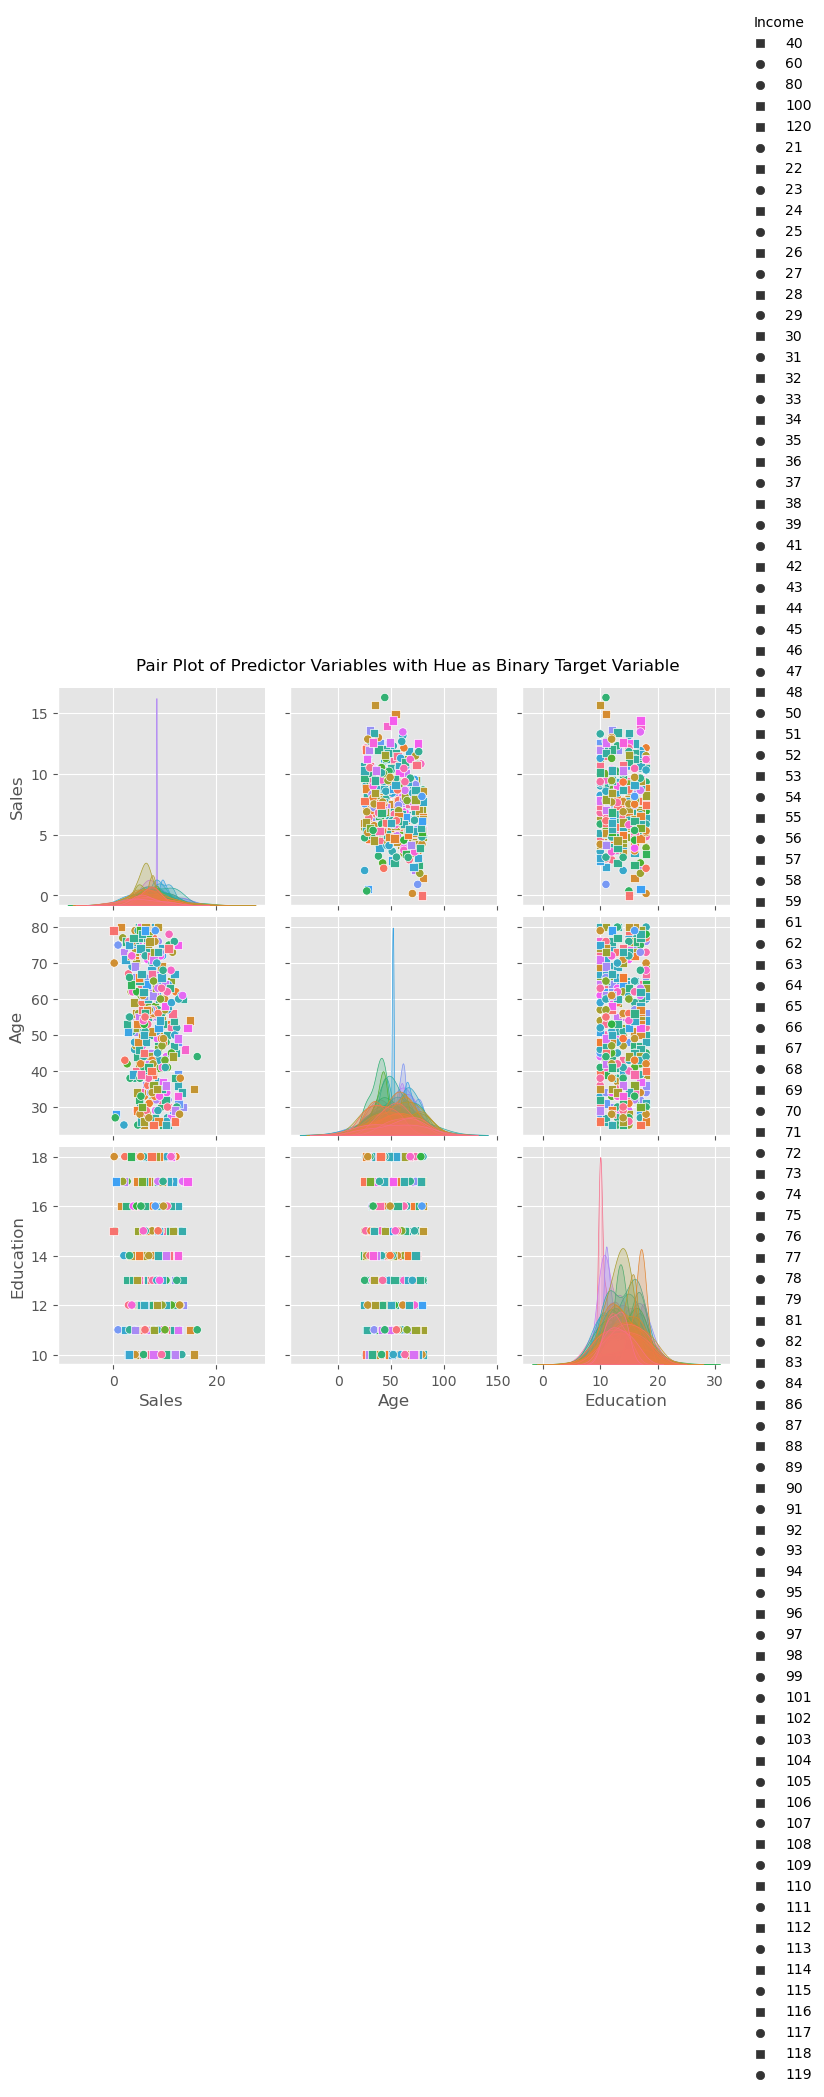

In [35]:
ct1=['Sales','Income','Age','Education']
sns.pairplot(df[ct1], hue='Income', markers=["o", "s"], palette="husl")
plt.suptitle('Pair Plot of Predictor Variables with Hue as Binary Target Variable', y=1.02)
plt.show()

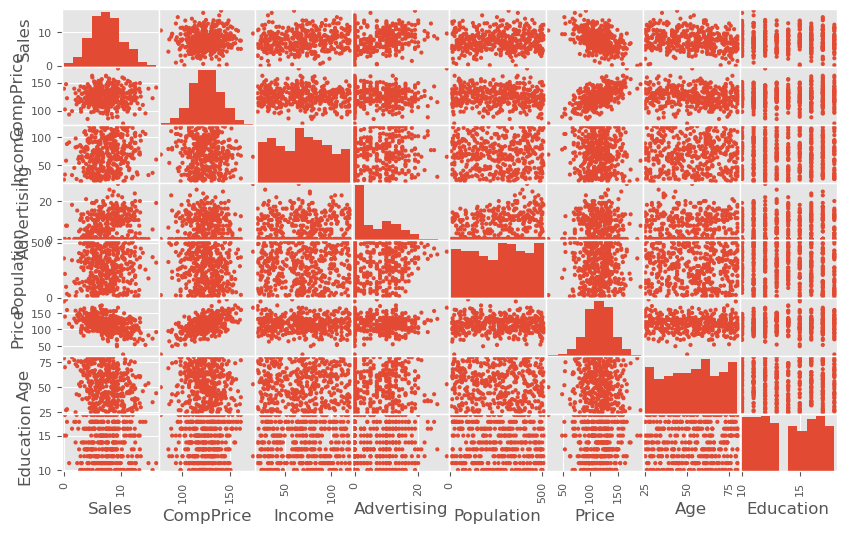

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

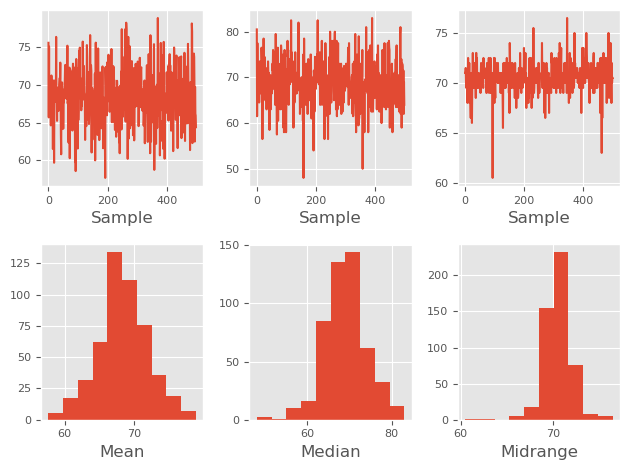

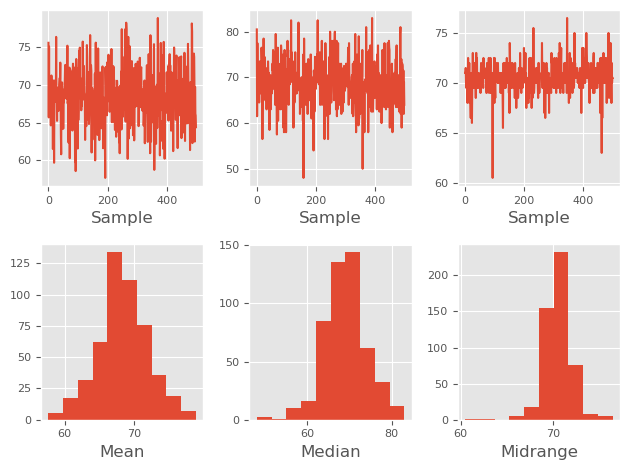

In [37]:
pd.plotting.bootstrap_plot(df['Income'])

In [76]:
df1['label'] = df1['Sales'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# Split the data into features (X) and target variable (y)
X = df1.drop(['Sales', 'label'], axis=1)
y = df1['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 1.00
Confusion Matrix:
[[80]]
Classification Report:
              precision    recall  f1-score   support

       Risky       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [73]:
from sklearn.tree import export_graphviz
from graphviz import Source


In [ ]:
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

# Visualize the decision tree using graphviz
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=list(X.columns),
                           class_names=[str(target) for target in ],  
                           filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)
graph.render("decision_tree_visualization", format='png')  # Output visualization as PNG file
graph.view()  # Open the visuali


Q2

In [28]:
df2=pd.read_csv(r"C:\Users\sandr\Downloads\Fraud_check.csv")

In [29]:
df2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [30]:
df2.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [31]:
df2.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [33]:
df2.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

(array([0, 1, 2]),
 [Text(0, 0, 'Taxable.Income'),
  Text(1, 0, 'City.Population'),
  Text(2, 0, 'Work.Experience')])

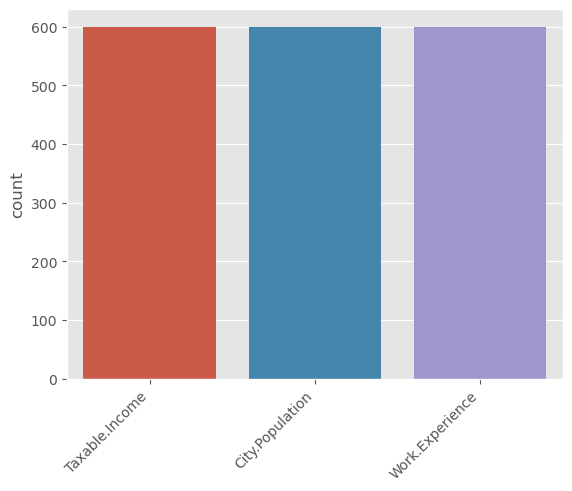

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df2,)
plt.xticks(rotation=45, ha='right')

<Axes: >

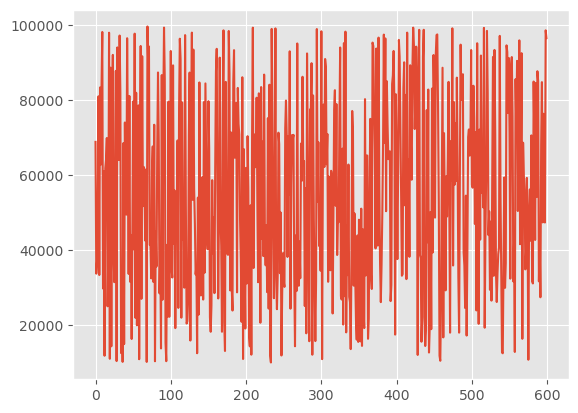

In [35]:
df2['Taxable.Income'].plot()

<Axes: xlabel='Work.Experience', ylabel='Taxable.Income'>

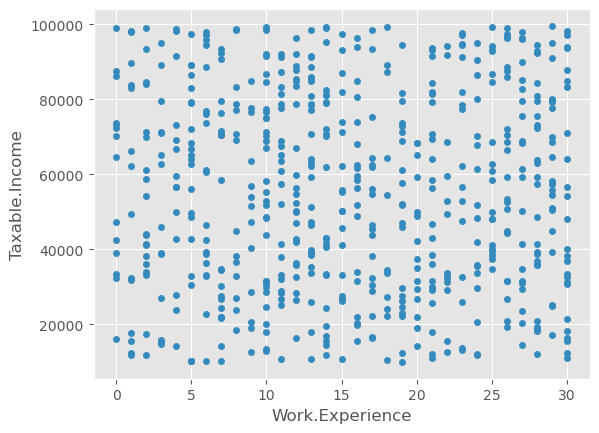

In [36]:
df2.plot(kind ='scatter',x ='Work.Experience', y="Taxable.Income")

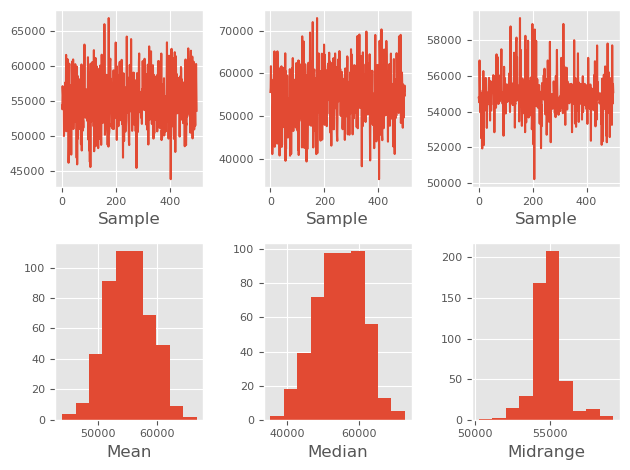

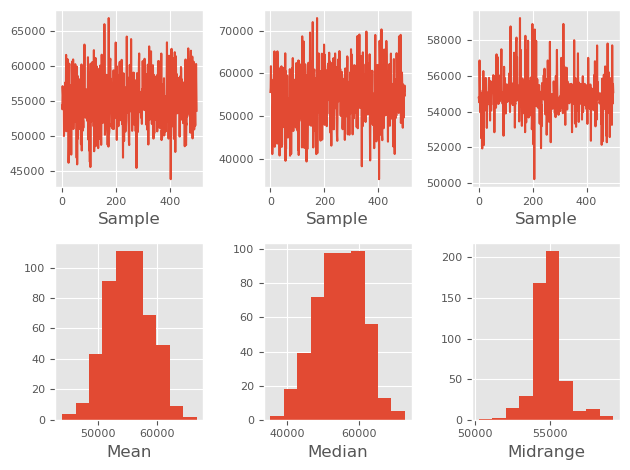

In [37]:
pd.plotting.bootstrap_plot(df2['Taxable.Income'])

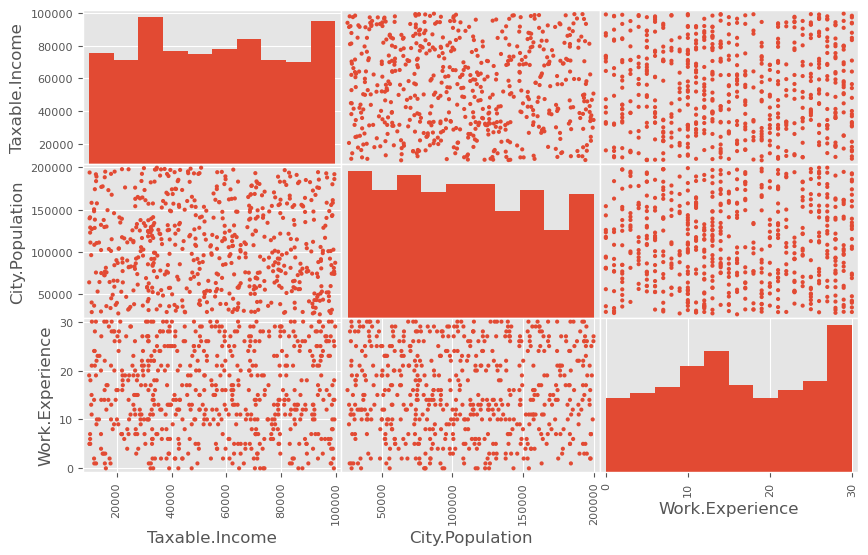

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2, alpha=1,figsize=(10,6));

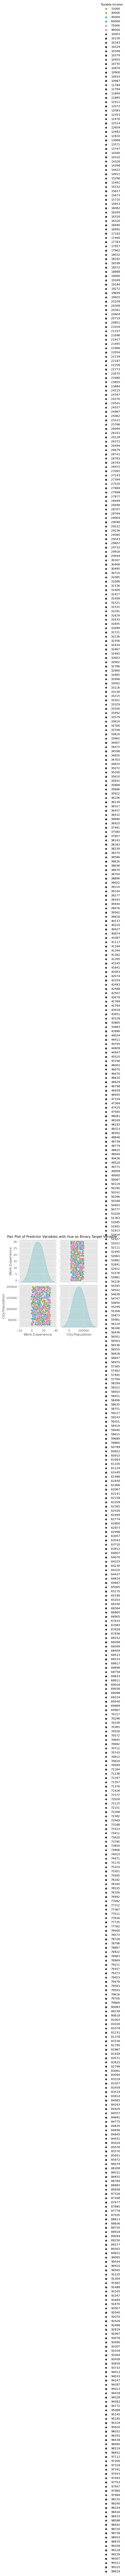

In [39]:
ct1=['Taxable.Income','Work.Experience','City.Population']
sns.pairplot(df2[ct1], hue='Taxable.Income', markers=["o", "s"], palette="husl")
plt.suptitle('Pair Plot of Predictor Variables with Hue as Binary Target Variable', y=1.02)
plt.show()

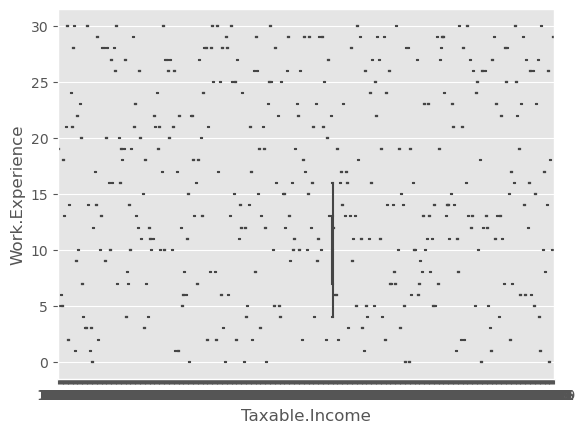

In [40]:
sns.boxplot(x='Taxable.Income', y='Work.Experience', data=df2)
plt.show()

<Axes: ylabel='Density'>

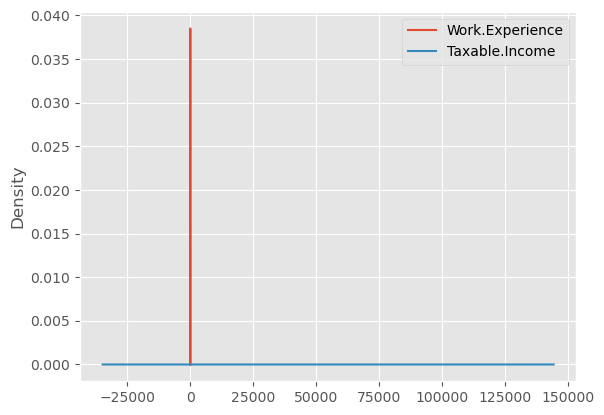

In [44]:
df2[['Work.Experience','Taxable.Income']].plot(kind='kde')

In [42]:
df3=pd.get_dummies(df2, columns=['Urban','Undergrad','Marital.Status'], drop_first=True)
df3

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,True,False,False,True
1,33700,134075,18,True,True,False,False
2,36925,160205,30,True,False,True,False
3,50190,193264,15,True,True,False,True
4,81002,27533,28,False,False,True,False
...,...,...,...,...,...,...,...
595,76340,39492,7,True,True,False,False
596,69967,55369,2,True,True,False,False
597,47334,154058,0,True,False,False,False
598,98592,180083,17,False,True,True,False


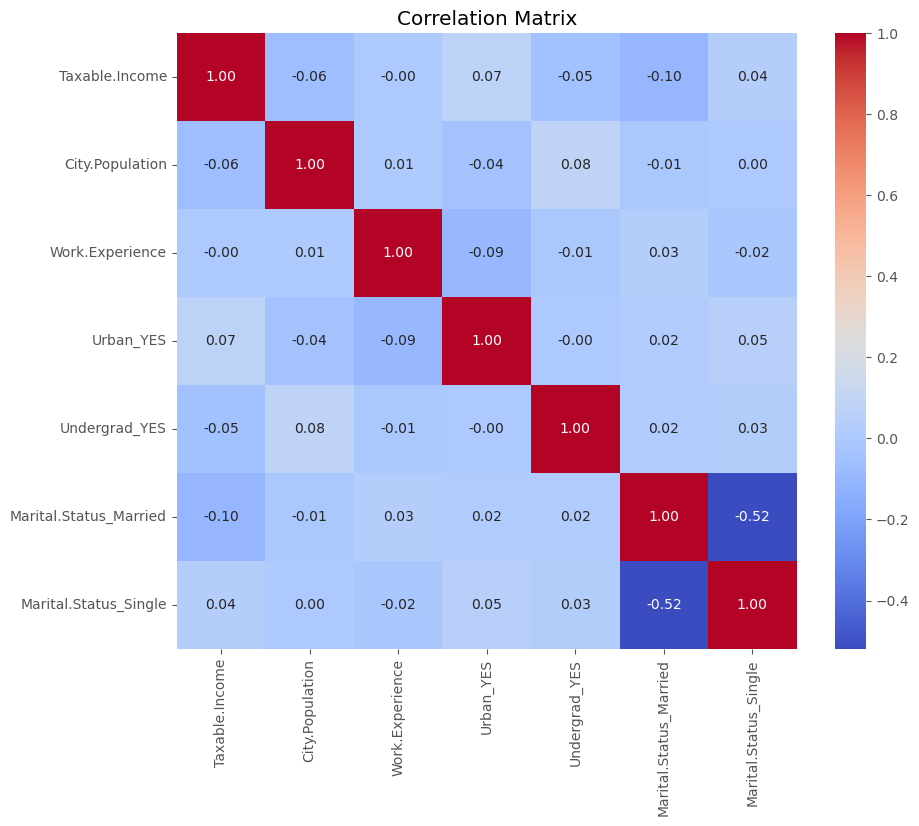

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [44]:
df3['label'] = df3['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# Split the data into features (X) and target variable (y)
X = df3.drop(['Taxable.Income', 'label'], axis=1)
y = df3['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.67
Confusion Matrix:
[[76 18]
 [22  4]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.78      0.81      0.79        94
       Risky       0.18      0.15      0.17        26

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120



In [40]:
from sklearn import tree
import graphviz

In [2]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 640.0 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00


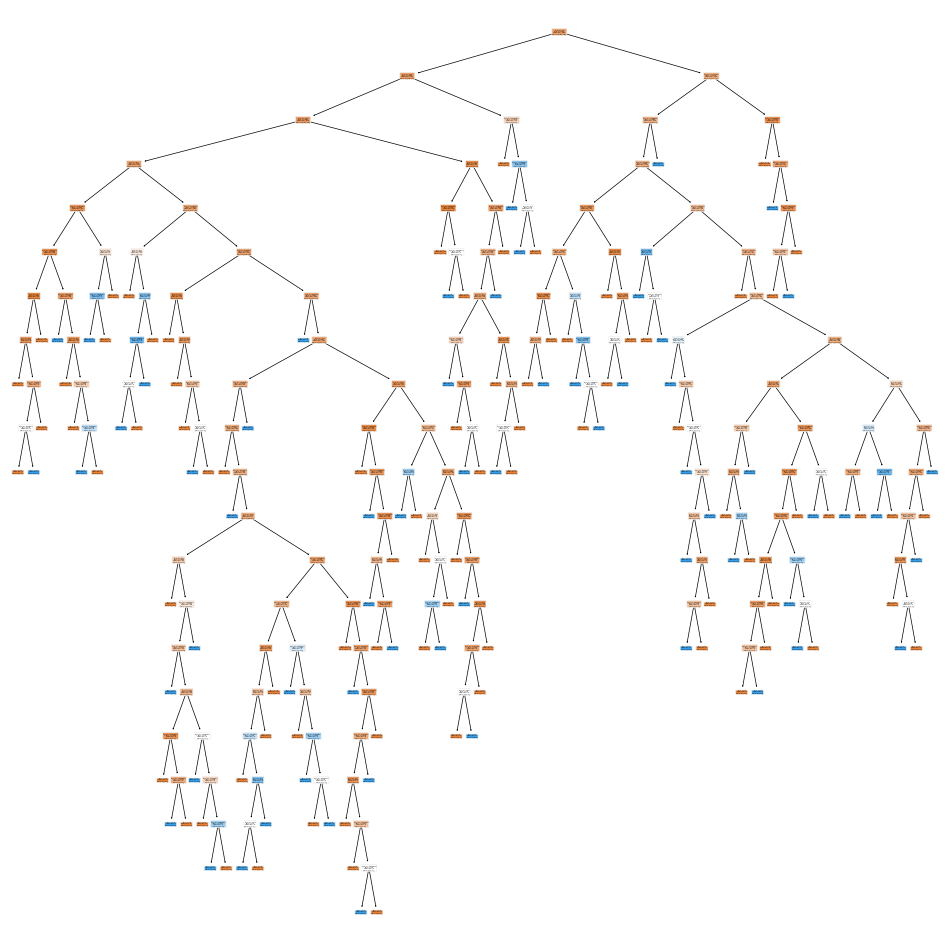

In [57]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model, feature_names=None, class_names=None, filled=True, rounded=True, ax=ax)

# Show the plot
plt.show()